In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# # Colab library to upload files to notebook
# from google.colab import files

# # Install Kaggle library
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# # Upload kaggle API key file
# uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

# !pip install --upgrade --force-reinstall --no-deps kaggle

# !kaggle competitions download -c "shopee-product-detection-student" -p "/content/drive/My Drive/shopee"

# %cd "/content/drive/My Drive/shopee"
# !unzip shopee-product-detection-student

In [ ]:
!ls /content/drive/My\ Drive/shopee/train/train/train

00  03	06  09	12  15	18  21	24  27	30  33	36  39
01  04	07  10	13  16	19  22	25  28	31  34	37  40
02  05	08  11	14  17	20  23	26  29	32  35	38  41


In [ ]:
# uncomment to create folder structure

# %cd /content/drive/My\ Drive/shopee/train/train
# !mkdir test
# %cd /content/drive/My\ Drive/shopee/train/train/test
# !mkdir 00
# !mkdir 01
# !mkdir 02
# !mkdir 03
# !mkdir 04
# !mkdir 05
# !mkdir 06
# !mkdir 07
# !mkdir 08
# !mkdir 09

/content/drive/My Drive/shopee/train/train
mkdir: cannot create directory ‘test’: File exists
/content/drive/My Drive/shopee/train/train/test


In [ ]:
# number of images in each folder
# %cd /content/drive/My\ Drive/shopee/train/train/train

# !find 00 -type f -printf 1 | wc -c
# !find 01 -type f -printf 1 | wc -c
# !find 02 -type f -printf 1 | wc -c
# !find 03 -type f -printf 1 | wc -c
# !find 04 -type f -printf 1 | wc -c
# !find 05 -type f -printf 1 | wc -c
# !find 06 -type f -printf 1 | wc -c
# !find 07 -type f -printf 1 | wc -c
# !find 08 -type f -printf 1 | wc -c
# !find 09 -type f -printf 1 | wc -c

/content/drive/My Drive/shopee/train/train/train
2681
2660
957
373
1399
1458
1486
825
1473
1478


In [ ]:
# moving files from train to test (for validation)

# %cd /content/drive/My\ Drive/shopee/train/train/train/00
# !mv `ls | head -1200 | grep ".jpg"` "../../test/00"
# %cd ../01
# !mv `ls | head -1200 | grep ".jpg"` "../../test/01"
# %cd ../02
# !mv `ls | head -1200 | grep ".jpg"` "../../test/02"
# %cd ../03
# !mv `ls | head -200 | grep ".jpg"` "../../test/03"
# %cd ../04
# !mv `ls | head -1200 | grep ".jpg"` "../../test/04"
# %cd ../05
# !mv `ls | head -1200 | grep ".jpg"` "../../test/05"
# %cd ../06
# !mv `ls | head -1200 | grep ".jpg"` "../../test/06"
# %cd ../07
# !mv `ls | head -900 | grep ".jpg"` "../../test/07"
# %cd ../08
# !mv `ls | head -1200 | grep ".jpg"` "../../test/08"
# %cd ../09
# !mv `ls | head -1200 | grep ".jpg"` "../../test/09"

/content/drive/My Drive/shopee/train/train/train/40
/content/drive/My Drive/shopee/train/train/train/41


In [ ]:
import tensorflow as tf
import os
import cv2
import random
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50 as PretrainedModel, preprocess_input

In [ ]:
TRAIN_PATH = '/content/drive/My Drive/shopee/train/train/train'
VALID_PATH = '/content/drive/My Drive/shopee/train/train/test'
TEST_PATH = '/content/drive/My Drive/shopee/test/test/test'
IMAGE_SIZE = [500, 500]
BATCH_SIZE = 100

!ls /content/drive/My\ Drive/shopee/train/train/train/00 | head -5

7130428dca906e8c4758ef3d7d1fdde1.jpg
71561ac9f5481a4c91364afb5a87d28e.jpg
7169f279a85d2da73625bb93879e681a.jpg
716fd0602b94c14710aed0fba41c32dc.jpg
7174581c22caa3204d78413d03a4e806.jpg


In [ ]:
# useful for getting number of files
image_files = glob(TRAIN_PATH + '/*/*.jpg')
valid_image_files = glob(VALID_PATH + '/*/*.jpg')
# useful for getting number of classes
folders = glob(TRAIN_PATH + '/*')
print(f"number of image files: {len(image_files)}")
print(f"number of valid image files: {len(valid_image_files)}")
print(f"number of classes: {len(folders)}")

number of image files: 58693
number of valid image files: 46697
number of classes: 42


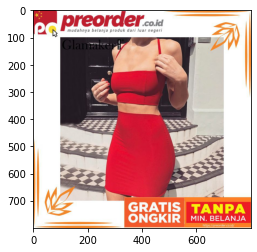

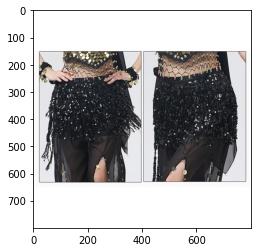

In [ ]:
# look at an image for fun
plt.imshow(image.load_img('drive/My Drive/shopee/train/train/train/00/7130428dca906e8c4758ef3d7d1fdde1.jpg'))
plt.show()
plt.imshow(image.load_img('drive/My Drive/shopee/train/train/train/00/71561ac9f5481a4c91364afb5a87d28e.jpg'))
plt.show()

In [ ]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)
# freeze pretrained model weights
ptm.trainable = False
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded

K = len(folders) # number of classes
x = GlobalMaxPooling2D()(ptm.output)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
# create a model object
model = Model(inputs=ptm.input, outputs=x)
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500, 500, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 506, 506, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 250, 250, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 250, 250, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# create an instance of ImageDataGenerator
gen_train = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [ ]:
# create generators
train_generator = gen_train.flow_from_directory(
  TRAIN_PATH,
  shuffle=True,
  target_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE,
)
valid_generator = gen_test.flow_from_directory(
  VALID_PATH,
  target_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE,
)

Found 58693 images belonging to 42 classes.
Found 46697 images belonging to 42 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=15,
  steps_per_epoch=int(np.ceil(len(image_files) / BATCH_SIZE)),
  validation_steps=int(np.ceil(len(valid_image_files) / BATCH_SIZE)),
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
259/294 [=========================>....] - ETA: 1:15:14 - loss: 6.4463 - accuracy: 0.2158

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
# Save the entire model as a SavedModel.
%cd /content
!mkdir /content/drive/My\ Drive/shopee/saved_model
model.save('/content/drive/My Drive/shopee/saved_model/my_model')

# TRAINED MODEL

In [ ]:
# Load Model
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/shopee/saved_model/my_model')
loaded_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
# Predict 1
dir = '/content/drive/My Drive/shopee/train/train/train'
folder = random.choice(os.listdir(dir))
filename = random.choice(os.listdir(f"{dir}/{folder}"))
filename = f"{dir}/{folder}/{filename}"

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = loaded_model.predict(img)
predicted_index = np.argmax(prediction)
print(f"predicted_index: {predicted_index}, real_index: {folder}, prediction percentage: {prediction[0][predicted_index]}")

(1, 200, 200, 3)
predicted_index: 38, real_index: 41, prediction percentage: 0.42370954155921936


In [ ]:
# Predict Test
test_csv_path = "/content/drive/My Drive/shopee/test.csv"
df = pd.read_csv(test_csv_path)
df.index.stop # replace value in range
for i in tqdm(range(df.index.stop)):
  filename = f"{TEST_PATH}/{df.iat[i,0]}"
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # plt.imshow(img)
  # plt.show()
  img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
  img = np.expand_dims(img, axis=0)
  prediction = loaded_model.predict(img)
  predicted_index = np.argmax(prediction)
  df.iat[i,1] = predicted_index
  pass

Streaming output truncated to the last 5000 lines.
100%|██████████| 12186/12186 [58:58<00:00,  3.44it/s]


In [ ]:
df.head(5)

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,20
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,29
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12


In [ ]:
df.to_csv(test_csv_path, index=False)